# HUMAN

In [9]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [10]:
data = pd.read_csv('../summary_data/ecoli_summary.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']



Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


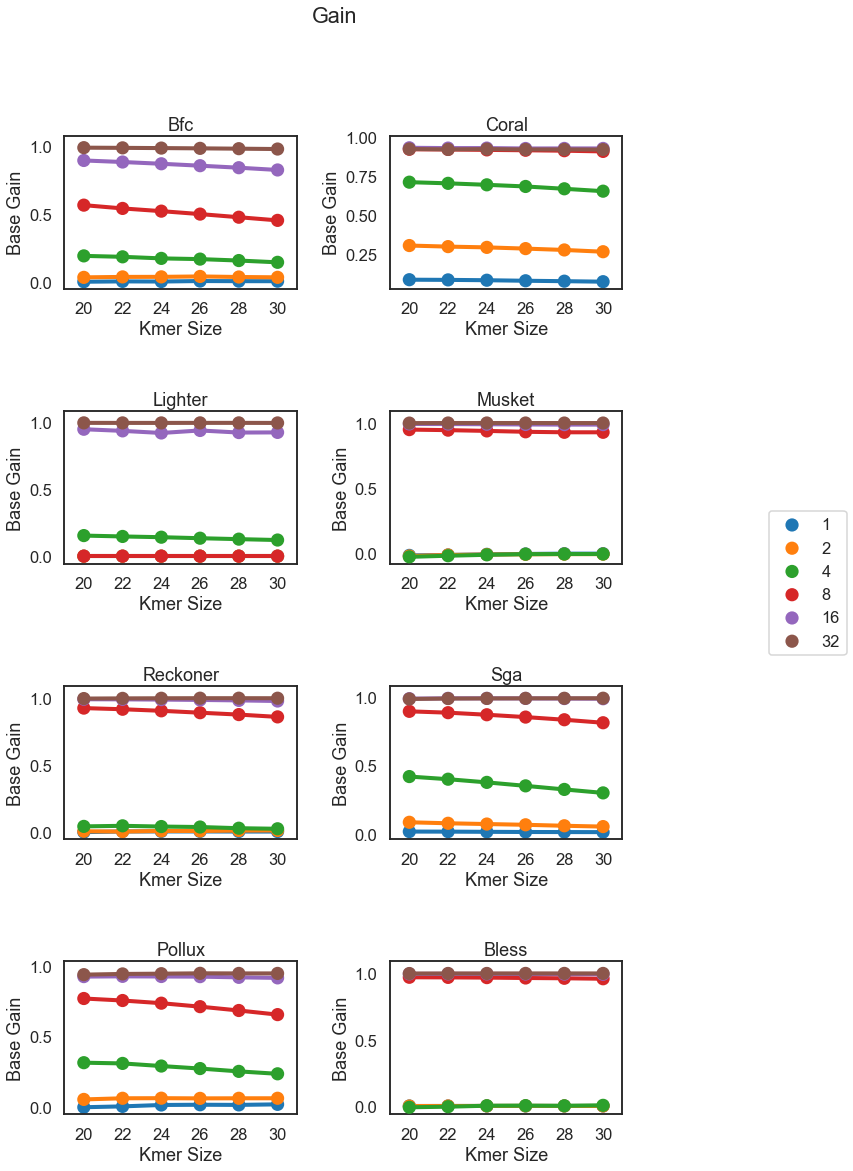

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
g=sns.set_style("white")
g=sns.set_context("talk")

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,18))
fig.subplots_adjust(hspace=0.8,wspace = 0.4)
fig.suptitle('Gain')

tools=('Bfc','Coral', 'Lighter', 'Musket', 'Reckoner', 'Sga', 'Pollux', 'Bless')
index=0
for ax in axes.flatten():
    g=sns.pointplot(x="Kmer Size", y="Base Gain", hue='Coverage',  data = data[(data['Tool'] == tools[index])], kind = "point", ax=ax)
    ax.set(title=tools[index])
    
    if index == 1:
        ax.get_legend().set_visible(True)
        ax.legend(bbox_to_anchor=(1, -1.5, 1., .102))
    else:
        ax.get_legend().set_visible(False)
    index+=1

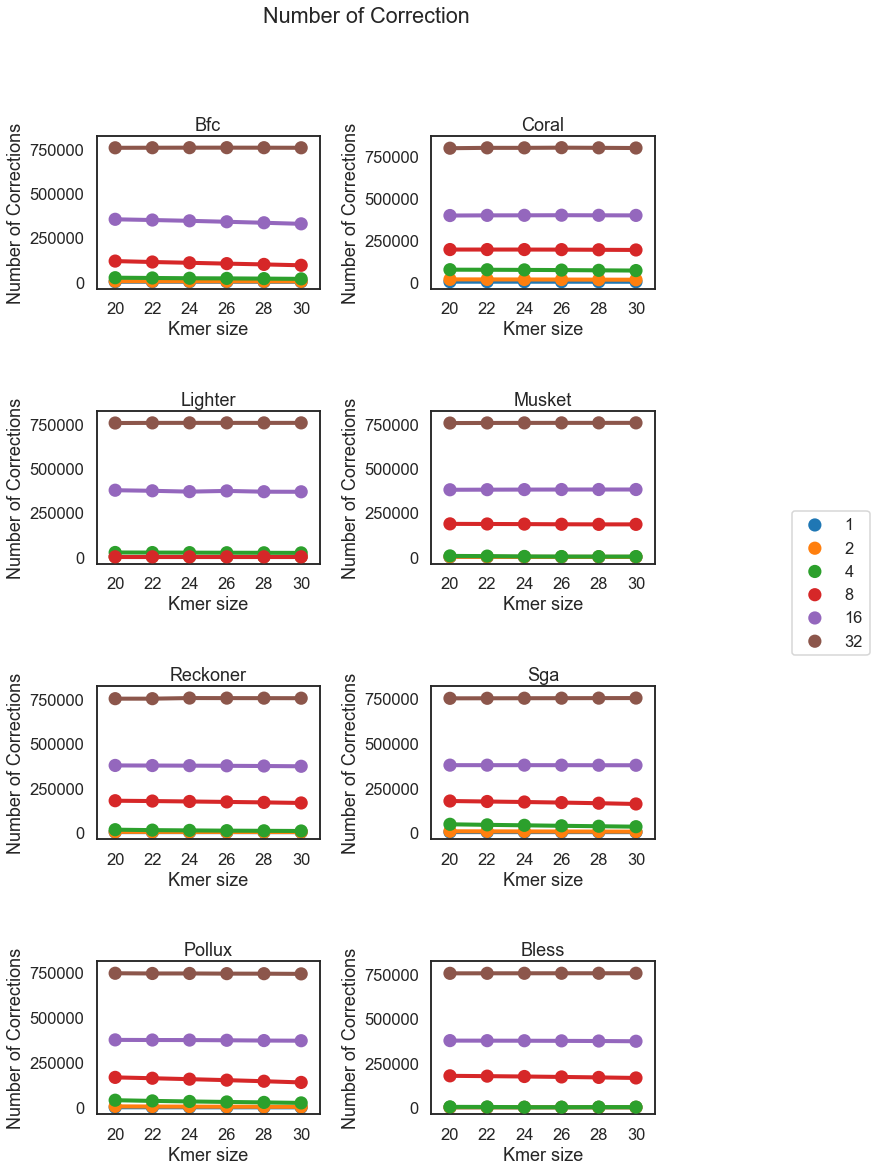

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
g=sns.set_style("white")
g=sns.set_context("talk")

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,18))
fig.subplots_adjust(hspace=0.8,wspace = 0.5)
fig.suptitle('Number of Correction')

tools=('Bfc','Coral', 'Lighter', 'Musket', 'Reckoner', 'Sga', 'Pollux', 'Bless')
index=0
for ax in axes.flatten():
    g=sns.pointplot(x="Kmer Size", y="total_corrections", hue='Coverage',  data = data[(data['Tool'] == tools[index])], kind = "point", ax=ax)
    ax.set(title=tools[index])
    g.set(xlabel='Kmer size', ylabel='Number of Corrections')

    if index == 1:
        ax.get_legend().set_visible(True)
        ax.legend(bbox_to_anchor=(1, -1.5, 1., .102))
    else:
        ax.get_legend().set_visible(False)
    index+=1

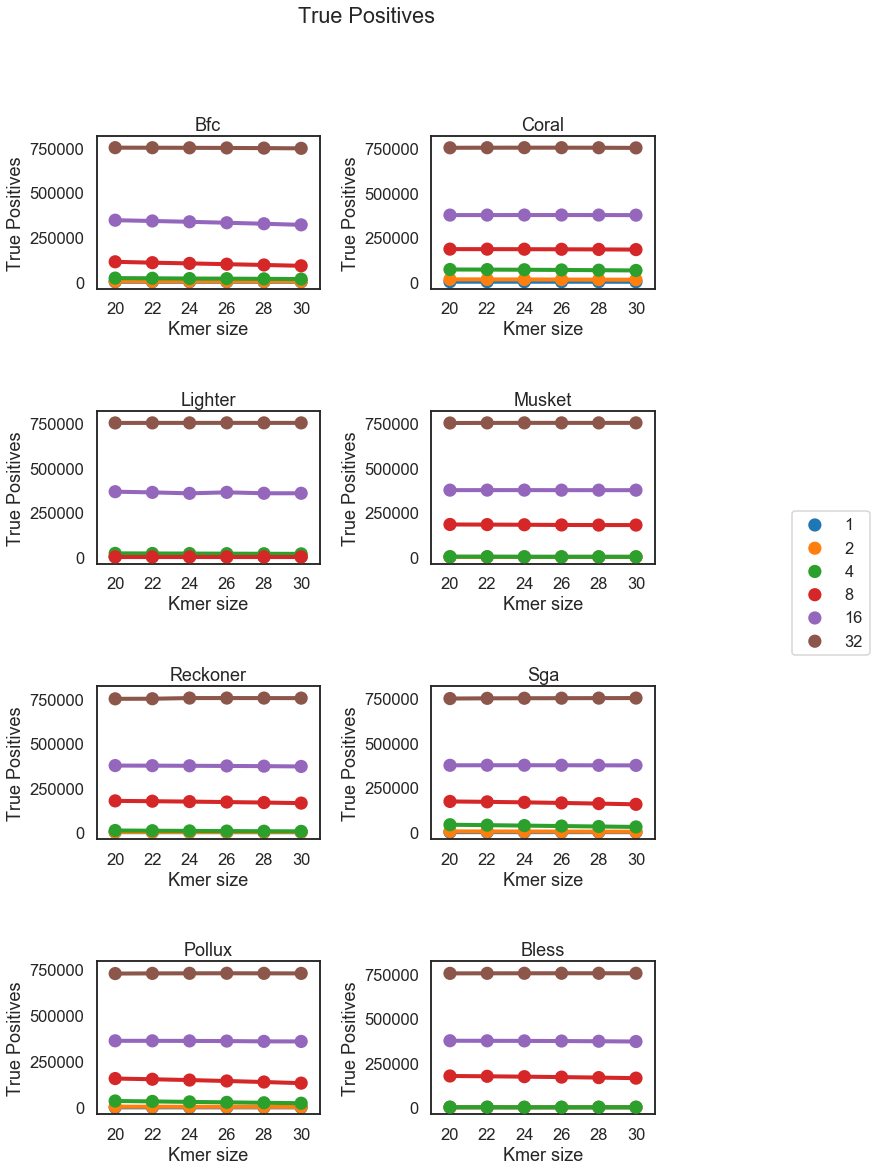

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
g=sns.set_style("white")
g=sns.set_context("talk")

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,18))
fig.subplots_adjust(hspace=0.8,wspace = 0.5)
fig.suptitle('True Positives')

tools=('Bfc','Coral', 'Lighter', 'Musket', 'Reckoner', 'Sga', 'Pollux', 'Bless')
index=0
for ax in axes.flatten():
    g=sns.pointplot(x="Kmer Size", y="Base - TP", hue='Coverage',  data = data[(data['Tool'] == tools[index])], kind = "point", ax=ax)
    ax.set(title=tools[index])
    g.set(xlabel='Kmer size', ylabel='True Positives')

    if index == 1:
        ax.get_legend().set_visible(True)
        ax.legend(bbox_to_anchor=(1, -1.5, 1., .102))
    else:
        ax.get_legend().set_visible(False)
    index+=1

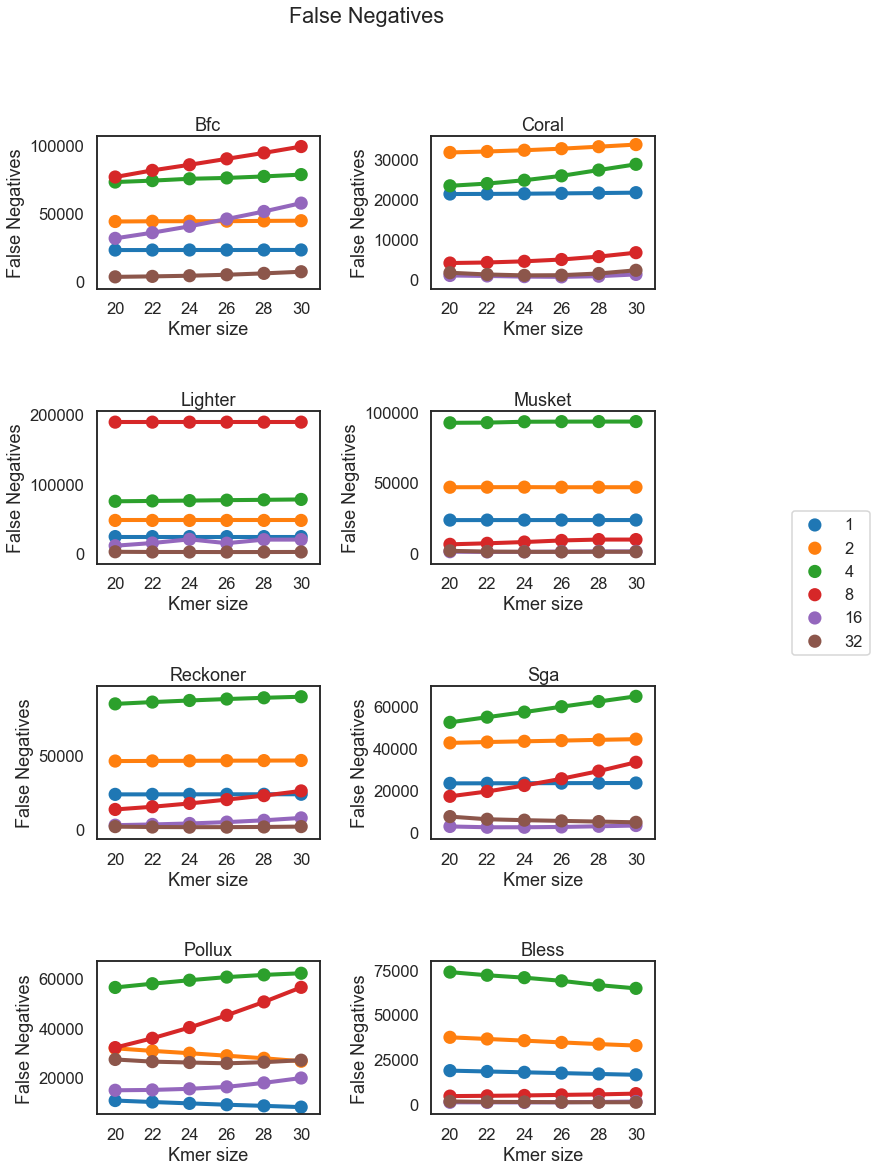

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
g=sns.set_style("white")
g=sns.set_context("talk")

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,18))
fig.subplots_adjust(hspace=0.8,wspace = 0.5)
fig.suptitle('False Negatives')

tools=('Bfc','Coral', 'Lighter', 'Musket', 'Reckoner', 'Sga', 'Pollux', 'Bless')
index=0
for ax in axes.flatten():
    g=sns.pointplot(x="Kmer Size", y="Base - FN", hue='Coverage',  data = data[(data['Tool'] == tools[index])], kind = "point", ax=ax)
    ax.set(title=tools[index])
    g.set(xlabel='Kmer size', ylabel='False Negatives')

    if index == 1:
        ax.get_legend().set_visible(True)
        ax.legend(bbox_to_anchor=(1, -1.5, 1., .102))
    else:
        ax.get_legend().set_visible(False)
    index+=1

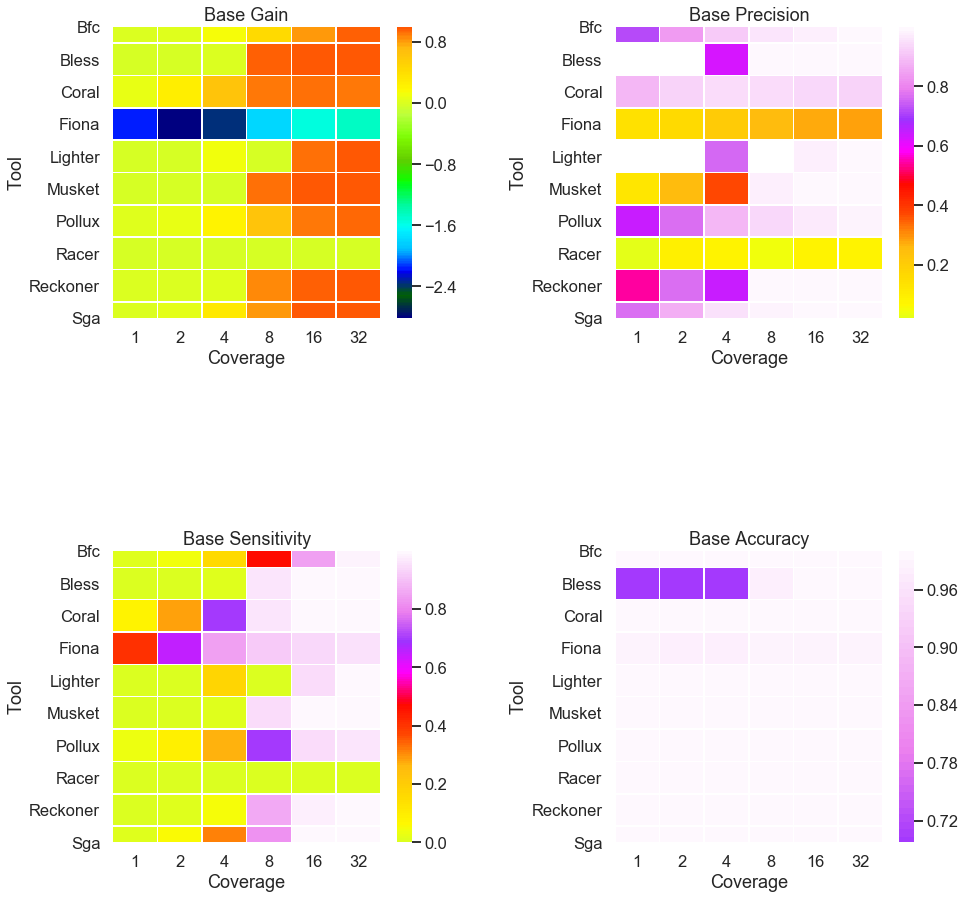

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

result =  data[(data['Kmer Size'] == 30) | (data['Kmer Size'] == 9181)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=0.8,wspace = 0.5)
#fig.suptitle('Gain')

attributes=('Base Gain', 'Base Precision', 'Base Sensitivity', 'Base Accuracy')

index=0
for ax in axes.flatten():   
    result_= result.pivot(index='Tool', columns='Coverage', values=attributes[index])
    g=sns.heatmap(result_, fmt="g", cmap='gist_ncar',center=0,linewidths=.5, ax=ax)
    g.set(title=attributes[index])
    index+=1

